In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


"\nY = np.load('Output_data_ML.npy')\nY = np.load('Output_data_ML_new.npy')\n"

In [58]:
#Y = np.load('/content/drive/My Drive/Quantum Research/QML Scattering/Output_data_ML.npy')
Y = np.load('/content/drive/My Drive/Quantum Research/QML Scattering/Output_data_ML_new.npy')

'''
Y = np.load('Output_data_ML.npy')
Y = np.load('Output_data_ML_new.npy')
'''

Y=Y.astype(np.float64)
print(np.shape(Y))

(1070107, 15)


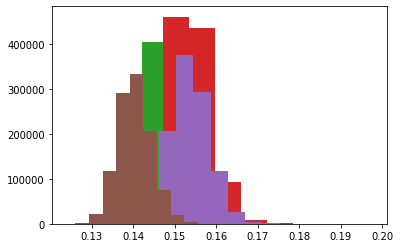

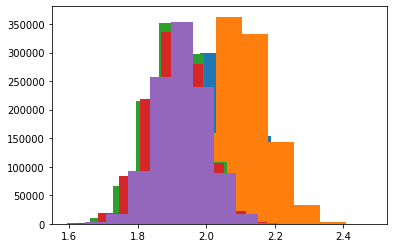

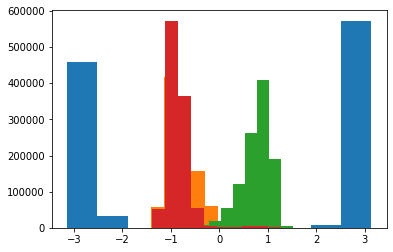

In [59]:
for i in range(6):
  plt.hist(Y[:,i])
plt.show()

for i in range(6,11):
  plt.hist(Y[:,i])
plt.show()

for i in range(11,15):
  plt.hist(Y[:,i])
plt.show()

In [51]:
Y[:,6:]=Y[:,6:]%(2*np.pi)

y_mean=np.mean(Y,axis=0)
y_std=np.std(Y,axis=0)
Y=(Y-y_mean)/y_std

#Y=np.log(Y)

R=np.array([i for i in range(Y.shape[0])])
np.random.shuffle(R)
Y=Y[R,:]  

Q1=np.quantile(Y,0.10,axis=0)
Q3=np.quantile(Y,0.90,axis=0)
IQR=Q3-Q1
Y=Y[~((Y < (Q1 - 1.5 * IQR)) |(Y > (Q3 + 1.5 * IQR))).any(axis=1)]

'''
#Re-Normalization is the worst idea. 
print(np.mean(Y,axis=0),np.std(Y,axis=0))
y_mean=np.mean(Y,axis=0)
y_std=np.std(Y,axis=0)
Y=(Y-y_mean)/y_std
'''
print(np.mean(Y,axis=0),np.std(Y,axis=0))

[ 0.00185421 -0.0011231  -0.00557265 -0.0025413   0.00083065 -0.00088865
 -0.02519635  0.01477237 -0.02005449 -0.02218668 -0.00711686  0.00925702
  0.15577102 -0.14125756  0.10888785] [1.00175749 1.00047772 0.99441738 0.99021984 0.99800293 0.9978466
 0.9931639  0.98470665 0.99251398 0.99288471 0.99477991 1.00084311
 0.29176436 0.29879601 0.27264212]


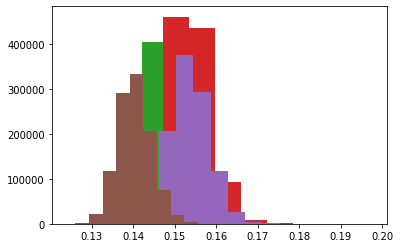

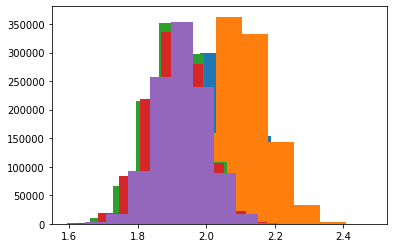

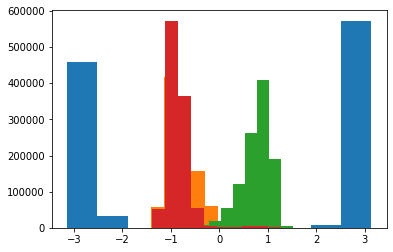

In [60]:
for i in range(6):
  plt.hist(Y[:,i])
plt.show()

for i in range(6,11):
  plt.hist(Y[:,i])
plt.show()

for i in range(11,15):
  plt.hist(Y[:,i])
plt.show()

In [61]:
Cov=Y.T@Y

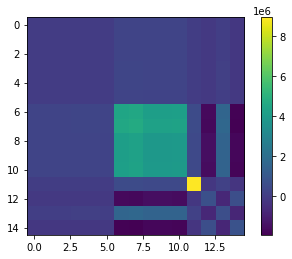

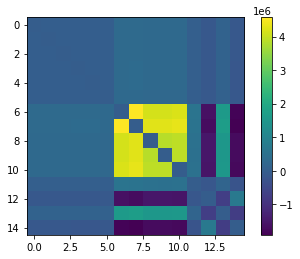

In [65]:
plt.imshow(Cov)
plt.colorbar()
plt.show()

plt.imshow(Cov-np.diag(np.diag(Cov)))
plt.colorbar()
plt.show()

In [63]:
eig, W = np.linalg.eig(Cov)

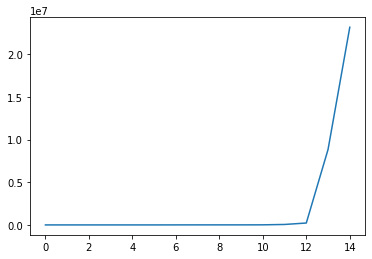

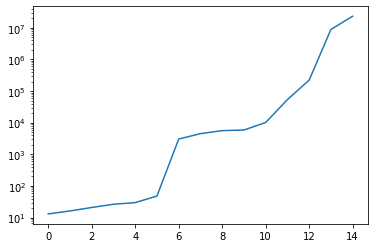

In [64]:
plt.plot(np.sort(eig))
plt.show()
plt.semilogy(np.sort(eig))
plt.show()

In [ ]:
np.shape(W[:2])

(2, 15)

(1050055, 2)


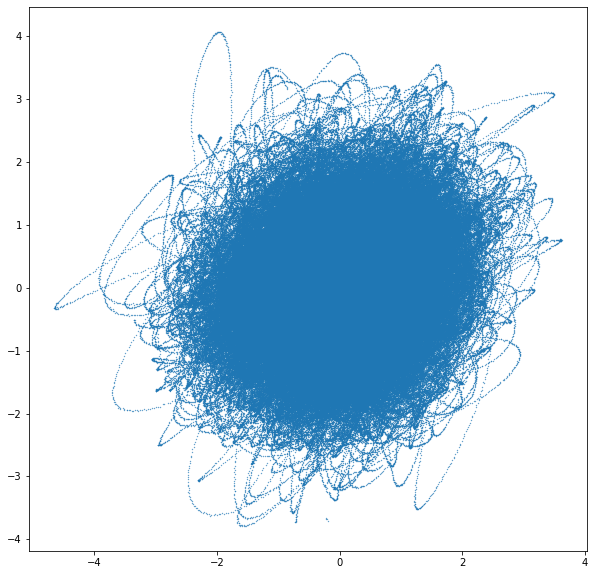

In [ ]:
latent=Y@W[:2].T
print(np.shape(latent))
plt.figure(figsize=(10,10))
plt.scatter(latent[:,0],latent[:,1],s=0.1)